In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
%matplotlib inline

In [28]:
df =pd.read_csv(r"E:\machine learning simplilearn\Demo Datasets\Lesson 4\Advertising.csv",index_col=0)

In [29]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
df.shape

(200, 4)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

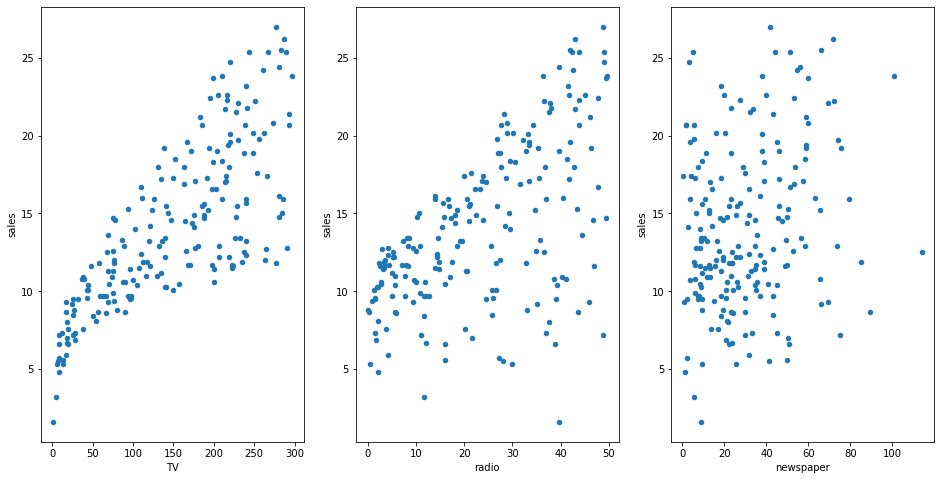

In [52]:
fig,axs=plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',figsize=(16,8),ax=axs[0])
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])


Regression


In [59]:
feature_cols=['TV']
x=df[feature_cols]
y=df.sales

In [61]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x,y)

LinearRegression()

In [62]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


now here we get intercept as 7.032593 and slope as 0.04753
that means our equation is 
y= 7.03259 + 0.0475 * x

EG) if x=50 tv then sales of tv are given below

In [68]:
x_value = pd.DataFrame({'TV':[50]})
x_value

,TV
0,50


In [69]:
lm.predict(x_value)      

array([9.40942557])

In [70]:
x_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [73]:
prediction=lm.predict(x_new) 
prediction

array([ 7.0658692 , 21.12245377])

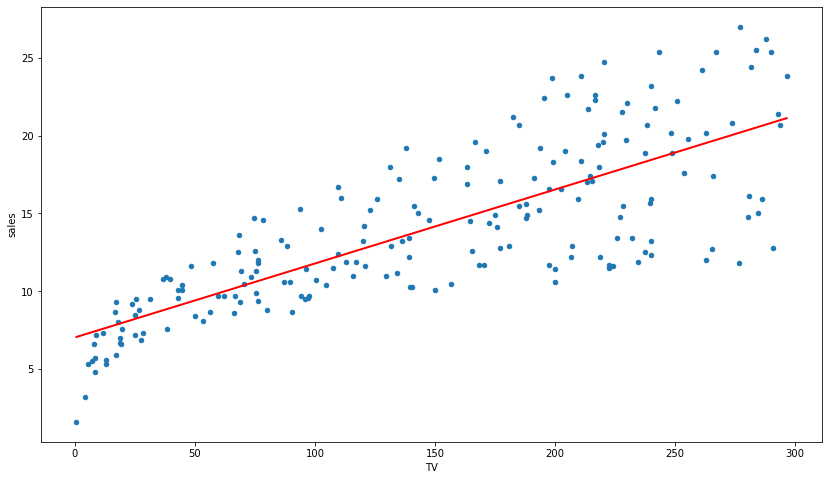

In [81]:
df.plot(kind='scatter',x='TV',y='sales',figsize=(14,8))
plt.plot(x_new,prediction,'r',linewidth=2)

In [83]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV',data=df).fit()

In [85]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [86]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [87]:
lm.rsquared

0.611875050850071

now we will use all feature as independent variables

In [91]:
feature_columns = ['TV','radio','newspaper']
X = df[feature_columns]
Y = df.sales

In [94]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size=0.3,random_state=45)

In [95]:
lm = LinearRegression()
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [97]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
print(lm.intercept_)
print(lm.coef_)


prediction = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,prediction)))

3.138944470344521
[ 0.04701415  0.18136082 -0.00851547]
1.5287414909541603


In [99]:
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        22:15:52   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""